In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nm

In [3]:
sentiment_data= pd.read_csv(r"C:\Users\pc\Downloads\Twitter_trainning_dataset.csv")
sentiment_data                            

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
name = ['tweet_id', 'entity', 'sentiment', 'tweet_content']
sentiment_data= pd.read_csv(r"C:\Users\pc\Downloads\Twitter_trainning_dataset.csv", names=name)
sentiment_data

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
sentiment_data.describe()

,tweet_id
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [7]:
sentiment_data.isna().sum()

tweet_id           0
entity             0
sentiment          0
tweet_content    686
dtype: int64

In [8]:
sentiment_data.value_counts()

tweet_id  entity                             sentiment   tweet_content                                                                                                                  
1094      AssassinsCreed                     Positive    Interesting.                                                                                                                       5
3263      Facebook                           Positive    Wow                                                                                                                                5
2842      Dota2                              Negative    Shit                                                                                                                               5
1932      CallOfDutyBlackopsColdWar          Positive    Wow                                                                                                                                5
10038     PlayerUnknownsBattlegrounds(PUBG)  Positive  

In [9]:
temp =sentiment_data.groupby('sentiment').count()['tweet_id'].reset_index().sort_values(by='tweet_id',ascending=False)
temp.style.background_gradient()

,sentiment,tweet_id
1,Negative,22542
3,Positive,20832
2,Neutral,18318
0,Irrelevant,12990


<Axes: xlabel='sentiment', ylabel='count'>

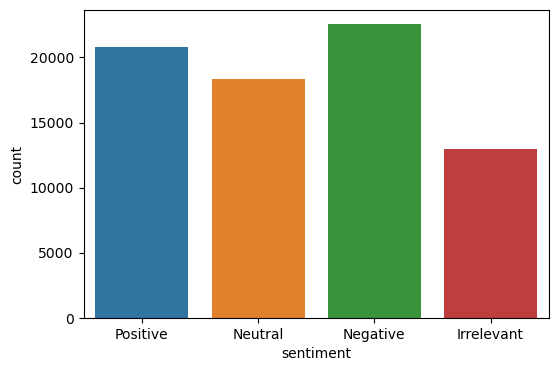

In [10]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment',data=sentiment_data)

In [11]:
sentiment_data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
sentiment_data.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands and i will murder ...


In [12]:
columns = sentiment_data.columns[1::]


In [13]:
for col in columns:
    sentiment_data[col] = sentiment_data[col].str.lower()
sentiment_data.head(1)

,tweet_id,entity,sentiment,tweet_content
0,2401,borderlands,positive,im getting on borderlands and i will murder yo...


In [14]:
sentiment_data['sentiment'] = sentiment_data['sentiment'].map({'negative': 0, 'positive': 1, 'neutral' : 2, 'irrelevant' : 3})

In [15]:
sentiment_data.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,borderlands,1,im getting on borderlands and i will murder yo...
1,2401,borderlands,1,i am coming to the borders and i will kill you...
2,2401,borderlands,1,im getting on borderlands and i will kill you ...
3,2401,borderlands,1,im coming on borderlands and i will murder you...
4,2401,borderlands,1,im getting on borderlands and i will murder ...


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [21]:
countvector = CountVectorizer(ngram_range=(2, 2))

In [28]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stops=set(stopwords.words('english'))
def preprocessing_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '',text)
    text=text.lower()
    token=text.split()
    token=[ps.stem(word) for word in token if word not in stops]
    return ' '.join(token)